<a href="https://colab.research.google.com/github/MicroPyscho/MicroPyscho/blob/main/PlacementProjectContd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install evidently
!pip install facets-overview
!pip install yfinance
!pip install pandas stata-merge
!pip install plotly==5.20.0
!pip install --upgrade hvplot
!pip install --upgrade holoviews
!pip install lasio
!pip install -U ipykernel
!pip install --upgrade panel


ERROR: Could not find a version that satisfies the requirement stata-merge (from versions: none)
ERROR: No matching distribution found for stata-merge


In [2]:
import pandas as pd
import plotly.express as px
import lasio as ls
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
import holoviews as hv
import panel as pn

from google.colab import output
output.enable_custom_widget_manager()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = "/content/drive/MyDrive/FinalDataset.dta"
df = pd.read_stata(file_path)

In [5]:
df.head(None)

,DSCD,ticker,ISIN,ICBIC,ICBIN,fic,country,currency,exchange,startdate,...,climate_economic,climate_governance,climate_readiness_delta,climate_readiness,climate_social,ai_ranking,ai_score,ai_govt,ai_tech,ai_infr
0,92174E,EMAARDEV,AEE001901017,35,Real Estate,ARE,United Arab Emirates,United Arab Emirates Dirham,Dubai Financial Market,NaT,...,0.710840,0.691174,-0.085728,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
1,35963J,NMDC,AEN000401010,50,Industrials,ARE,United Arab Emirates,United Arab Emirates Dirham,Abu Dhabi,NaT,...,0.710840,0.691174,-0.085728,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
2,50814V,SCIDC,AES000401019,50,Industrials,ARE,United Arab Emirates,United Arab Emirates Dirham,Abu Dhabi,NaT,...,0.710840,0.691174,-0.085728,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
3,50577H,NCC,AEN000901019,50,Industrials,ARE,United Arab Emirates,United Arab Emirates Dirham,Dubai Financial Market,NaT,...,0.710840,0.691174,-0.085728,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
4,35963C,GCEM,AEG000101010,50,Industrials,ARE,United Arab Emirates,United Arab Emirates Dirham,Abu Dhabi,NaT,...,0.710840,0.691174,-0.085728,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97458,86778N,ZMBF,ZM0000000201,45,Consumer Staples,ZMB,Zambia,United States Dollar,Non NASDAQ OTC,2013-06-26,...,0.413829,0.404942,-0.025261,0.323668,0.152233,133.0,31.214437,35.083679,21.932634,36.626999
97459,75895D,NATB,ZM0000000086,45,Consumer Staples,ZMB,Zambia,Zambian Kwacha,Lusaka,2011-01-03,...,NaN,NaN,NaN,NaN,NaN,146.0,29.631393,31.552050,19.591747,37.750381
97460,683008,ZSUG,ZM0000000052,55,Basic Materials,ZMB,Zambia,Zambian Kwacha,Lusaka,2011-01-03,...,NaN,NaN,NaN,NaN,NaN,146.0,29.631393,31.552050,19.591747,37.750381
97461,86778N,ZMBF,ZM0000000201,45,Consumer Staples,ZMB,Zambia,United States Dollar,Non NASDAQ OTC,2013-06-26,...,NaN,NaN,NaN,NaN,NaN,146.0,29.631393,31.552050,19.591747,37.750381


In [6]:
print(df.tail(20))

         DSCD ticker          ISIN  ICBIC                   ICBIN  fic  \
97443  9110D0    KAL  ZAE000244711     40  Consumer Discretionary  ZAF   
97444  51744K    MRF  ZAE000060000     55         Basic Materials  ZAF   
97445  88092T   SBSW  US82575P1075     55         Basic Materials  ZAF   
97446  683017   LAFA  ZM0000000011     50             Industrials  ZMB   
97447  683008   ZSUG  ZM0000000052     55         Basic Materials  ZMB   
97448  75895D   NATB  ZM0000000086     45        Consumer Staples  ZMB   
97449  32009X   ZMBF  ZM0000000201     45        Consumer Staples  ZMB   
97450  86778N   ZMBF  ZM0000000201     45        Consumer Staples  ZMB   
97451  75895F   ZMFA  ZM0000000243     10              Technology  ZMB   
97452  53502U   ATEL  ZM0000000342     15      Telecommunications  ZMB   
97453  32009X   ZMBF  ZM0000000201     45        Consumer Staples  ZMB   
97454  53502U   ATEL  ZM0000000342     15      Telecommunications  ZMB   
97455  683008   ZSUG  ZM0000000052    

In [7]:
df.shape

(97463, 912)

In [8]:
df.isna().any().sum()

814

In [9]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

miss_df = df.isna().sum()
missv_df = pd.DataFrame(miss_df, columns=["Missing Values"])
missv_df = missv_df.T

print(missv_df)

print("\nData types of all columns:")
print(df.dtypes)

                DSCD  ticker  ISIN  ICBIC  ICBIN  fic  country  currency  \
Missing Values     0       0     0      0      0    0        0         0   

                exchange  startdate  startyear  WC06011  WC07040  INCORP  \
Missing Values         0      59513          8       26     2046    7164   

                year  _EPS  _EPS1MN  _EPS1NE  _EPS1NET  _EPS2MN   _MV  _MVC  \
Missing Values     0  5732    53242    53242     53682    53650  3244  3490   

                  _P   _PI   _RI  _WC01001  _WC01016  _WC01051  _WC01075  \
Missing Values  6636  6987  6891         0     97463        24     97453   

                _WC01076  _WC01084  _WC01100  _WC01101  _WC01151  _WC01201  \
Missing Values     97463     22451        24      7768         0         0   

                _WC01249  _WC01250  _WC01251  _WC01266  _WC01401  _WC01451  \
Missing Values         2         0      1882     18141        22        17   

                _WC01501  _WC01551  _WC01651  _WC01706  _WC01751  _W

In [10]:
def select_df(df, selected_df):
  return df[selected_df]

selected_df = ["ticker", "ISIN", "ICBIC", "ICBIN", "fic", "country", "exchange", "startyear", "WC06011", "WC07040", "INCORP", "year", "_EPS", "_MV", "_P", "_PI", "_RI", "_WC01001", "_WC01201", "_WC01651", "_WC02001", "_WC02999", "_WC03351", "_WC03999", "_WC04049", "_WC08001", "_WC02201", "_WC18193", "SIC", "ffi48", "age", "logage", "size", "logsales", "tlta", "logmktcap", "clta", "cata", "apta", "arta", "cfw", "roa", "lroa", "roe", "lroe", "tobinq", "ltobinq", "mktvalue", "mb", "_CGSCORE", "_CGVSDP050", "_CGVSDP026", "_CGVSDP054", "_ENERDP0051", "_ENERDP013", "_CGBSDP049", "_CGBSDP062", "_CGVSDP041", "_ENERDP023", "_ENERDP024", "_ENERDP025", "_ENERDP014", "_ENERDP045", "_ENERDP049", "_ENERDP052", "_ENERDP056", "_ENERDP068", "_ENERDP070", "_ENERDP076", "_ENERDP089", "_ENERDP091", "_ENERDP092", "_ENERDP096", "_ENERDP0961", "_ENERDP098", "_ENERDP123", "_ENERO03V", "_ENERO10V", "_ENERO11V", "_ENERO12V", "_ENERO25V", "_ENERO26V", "_ENERO27V", "_ENERO28V", "_ENERO30V", "_ENERO32V", "_ENERO33V", "_ENERO34V", "_ENERO35V", "_ENERO37V", "_ENERO39V", "_ENERO40V", "_ENERO41V", "_ENERO42V", "_ENERO44V", "_ENPIDP015", "_ENPIDP019", "_ENPIDP034", "_ENPIDP037", "_ENPIDP066", "_ENPIDP069", "_ENPIDP079", "_ENPIDP080", "_ENRRDP033", "_ENRRDP0451", "_ENRRDP0452", "_ENRRDP060", "_ENRRDP0601", "_ENRRDP066", "_ENSCORE", "_SOCODP0069", "_SODODP0151", "_SODODP016", "_SODODP017", "_SODODP019", "_SODODP032", "_SODODP037", "_SODODP043","_SOEQDP019", "_SOEQDP034", "_SOHSD01V", "_SOSCORE", "_TRESGS", "_TRESGENERS", "_TRESGENRRS", "TCE", "logTCE", "DCE", "logDCE", "INDCE", "logINDCE", "EMScore", "logEMScore", "TWaste", "logTWaste", "WasteTA", "TCETA", "ENVScore", "logENVScore", "EnergyUse", "EnergyUseTA", "logGOVScore", "SUS_report", "ESG", "CO2eGDP", "CO2eGDP_PPP2017", "CO2eGDP_PPP", "FDI_OUTGDP", "FDI_INFGDP", "GDP_K2015", "GDP_Cur", "GDPdeflator", "GDP_percap2015", "MktCapGDP", "GovtDebtGDP", "INFL_conpx", "INFL_GDPdeflator", "INTSpread", "LENDINT", "ImportsGDP", "ExportsGDP", "vae", "pve", "gee", "rqe", "rle", "cce", "ficincome", "hdi_score", "pop_score", "gdp_score", "gain", "climatevul_capacity", "climatevul_exposure", "climatevul_sensitivity", "climate_vul", "climate_economic", "climate_governance", "climate_readiness", "climate_social", "ai_ranking", "ai_score", "ai_govt", "ai_tech", "ai_infr"]

new_df = select_df(df, selected_df)
new_df.to_csv("/content/drive/My Drive/select_df.csv", index=False)

In [11]:
new_df.shape

(97463, 185)

In [12]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

miss_dff = new_df.isna().sum()
missv_dff = pd.DataFrame(miss_dff, columns=["Missing Values"])
missv_dff = missv_dff.T

print(missv_dff)

print("\nData types of all columns:")
print(new_df.dtypes)

                ticker  ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Missing Values       0     0      0      0    0        0         0          8   

                WC06011  WC07040  INCORP  year  _EPS   _MV    _P   _PI   _RI  \
Missing Values       26     2046    7164     0  5732  3244  6636  6987  6891   

                _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  _WC03351  \
Missing Values         0         0         6         0         0         0   

                _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  SIC  ffi48  \
Missing Values         0      8978         0         0     16769    0      0   

                age  logage  size  logsales  tlta  logmktcap  clta  cata  \
Missing Values    8       8     0      2839     0          0     0     0   

                apta  arta  cfw  roa  lroa  roe  lroe  tobinq  ltobinq  \
Missing Values  1229   133    0    0  9028   17  9037       0     9028   

                mktvalue  mb  _CGSCORE  _CGVSDP050  _CGV

In [13]:
# Drop columns with 75,000 or more missing values
threshold = 77000
fltrd_df = new_df.dropna(axis=1, thresh=len(new_df) - threshold)

# Display the filtered DataFrame
print("Columns after dropping those with 80,000 or more missing values:")
print(fltrd_df.columns)

# Display missing values and data types for the filtered DataFrame
miss_dff_fltrd = fltrd_df.isna().sum()
missv_dff_fltrd = pd.DataFrame(miss_dff_fltrd, columns=["Missing Values"])
missv_dff_fltrd = missv_dff_fltrd.T

print("\nMissing values after filtering:")
print(missv_dff_fltrd)

print("\nData types of all columns after filtering:")
print(fltrd_df.dtypes)


Columns after dropping those with 80,000 or more missing values:
Index(['ticker', 'ISIN', 'ICBIC', 'ICBIN', 'fic', 'country', 'exchange',
       'startyear', 'WC06011', 'WC07040',
       ...
       'climate_vul', 'climate_economic', 'climate_governance',
       'climate_readiness', 'climate_social', 'ai_ranking', 'ai_score',
       'ai_govt', 'ai_tech', 'ai_infr'],
      dtype='object', length=122)

Missing values after filtering:
                ticker  ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Missing Values       0     0      0      0    0        0         0          8   

                WC06011  WC07040  INCORP  year  _EPS   _MV    _P   _PI   _RI  \
Missing Values       26     2046    7164     0  5732  3244  6636  6987  6891   

                _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  _WC03351  \
Missing Values         0         0         6         0         0         0   

                _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  SIC  ffi48  \
Miss

##Mising Value Treatment for all 122 columns

---



In [14]:
import numpy as np

# Columns to interpolate using nearest method
interpolate_nearest = ["WC06011", "WC07040"]
for col in interpolate_nearest:
    fltrd_df.loc[:, col] = fltrd_df[col].interpolate(method="nearest")

# Columns to fill with mean
fill_mean = ["_P", "_PI", "_WC01651", "_WC04049"]
for col in fill_mean:
    fltrd_df.loc[:, col] = fltrd_df[col].fillna(fltrd_df[col].mean())

# Columns to interpolate with linear method
col_linear = ["_RI", "_WC18193", "logsales", "apta", "arta"]
fltrd_df[col_linear] = fltrd_df[col_linear].interpolate(method='linear')

# Columns to backfill
col_bf = ["age", "logage", "startyear", "roe", "lroe", "LENDINT", "INTSpread", "FDI_OUTGDP", "FDI_INFGDP", "GDP_K2015", "GDP_Cur", "GDPdeflator",
          "GDP_percap2015", "ImportsGDP", "ExportsGDP", "INFL_conpx", "INFL_GDPdeflator", "vae", "pve", "gee",
          "rqe", "rle", "cce", "climatevul_capacity", "hdi_score", "pop_score", "gdp_score", "gain",
          "climatevul_exposure", "climatevul_sensitivity", "climate_vul", "climate_economic", "climate_governance",
          "climate_readiness", "climate_social", "ai_ranking", "ai_score", "ai_govt", "ai_tech", "ai_infr"]
fltrd_df[col_bf] = fltrd_df[col_bf].interpolate(method="bfill")

# Fill missing values in ltobinq, lroe, and lroa with the log of corresponding values
fltrd_df["ltobinq"].fillna(np.log(fltrd_df["tobinq"]), inplace=True)
fltrd_df["lroe"].fillna(np.log(fltrd_df["roe"]), inplace=True)
fltrd_df["lroa"].fillna(np.log(fltrd_df["roa"]), inplace=True)

# Columns to drop all rows with missing values
columns_to_dropna = ["_EPS", "INCORP", "_MV", "startyear"]
fltrd_df = fltrd_df.dropna(subset=columns_to_dropna)

# Reset index
fltrd_df.reset_index(drop=True, inplace=True)


/tmp/ipykernel_49780/913857801.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd_df[col_linear] = fltrd_df[col_linear].interpolate(method='linear')
/tmp/ipykernel_49780/913857801.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltrd_df[col_bf] = fltrd_df[col_bf].interpolate(method="bfill")
/tmp/ipykernel_49780/913857801.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [15]:
ncol_bf = ["hdi_score", "pop_score", "lroa", "gdp_score", "gain", "LENDINT", "INTSpread", "climatevul_capacity", "climatevul_exposure", "climatevul_sensitivity", "climate_vul", "climate_economic", "climate_governance", "climate_readiness", "climate_social"]
fltrd_df[ncol_bf] = fltrd_df[ncol_bf].interpolate(method="ffill")

In [16]:
missing_val = fltrd_df.isna().sum()
un_fltrd_df = pd.DataFrame(missing_val, columns=["Missing Values"]).T

print("\nMissing values after filtering:")
print(un_fltrd_df)


Missing values after filtering:
                ticker  ISIN  ICBIC  ICBIN  fic  country  exchange  startyear  \
Missing Values       0     0      0      0    0        0         0          0   

                WC06011  WC07040  INCORP  year  _EPS  _MV  _P  _PI  _RI  \
Missing Values        0        0       0     0     0    0   0    0    0   

                _WC01001  _WC01201  _WC01651  _WC02001  _WC02999  _WC03351  \
Missing Values         0         0         0         0         0         0   

                _WC03999  _WC04049  _WC08001  _WC02201  _WC18193  SIC  ffi48  \
Missing Values         0         0         0         0         0    0      0   

                age  logage  size  logsales  tlta  logmktcap  clta  cata  \
Missing Values    0       0     0         0     0          0     0     0   

                apta  arta  cfw  roa  lroa  roe  lroe  tobinq  ltobinq  \
Missing Values     0     0    0    0     0    0     0       0        0   

                mktvalue  mb  _CG

In [17]:
fltrd_df.describe()

,ICBIC,startyear,WC06011,WC07040,INCORP,year,_EPS,_MV,_P,_PI,_RI,_WC01001,_WC01201,_WC01651,_WC02001,_WC02999,_WC03351,_WC03999,_WC04049,_WC08001,_WC02201,_WC18193,SIC,age,logage,size,logsales,tlta,logmktcap,clta,cata,apta,arta,cfw,roa,lroa,roe,lroe,tobinq,ltobinq,mktvalue,mb,_CGSCORE,_CGVSDP050,_CGVSDP026,_CGVSDP054,_ENERDP0051,_ENERDP013,_ENERDP068,_ENERDP070,_ENERDP076,_ENERDP089,_ENERDP123,_ENPIDP015,_ENPIDP019,_ENPIDP034,_ENPIDP037,_ENPIDP066,_ENPIDP069,_ENSCORE,_SOCODP0069,_SODODP0151,_SOHSD01V,_SOSCORE,_TRESGS,_TRESGENERS,_TRESGENRRS,EMScore,logEMScore,ENVScore,logENVScore,logGOVScore,SUS_report,ESG,CO2eGDP,CO2eGDP_PPP2017,CO2eGDP_PPP,FDI_OUTGDP,FDI_INFGDP,GDP_K2015,GDP_Cur,GDPdeflator,GDP_percap2015,MktCapGDP,GovtDebtGDP,INFL_conpx,INFL_GDPdeflator,INTSpread,LENDINT,ImportsGDP,ExportsGDP,vae,pve,gee,rqe,rle,cce,hdi_score,pop_score,gdp_score,gain,climatevul_capacity,climatevul_exposure,climatevul_sensitivity,climate_vul,climate_economic,climate_governance,climate_readiness,climate_social,ai_ranking,ai_score,ai_govt,ai_tech,ai_infr
count,85803.000000,85803.000000,85803.000000,8.580300e+04,85803.000000,85803.000000,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,8.580300e+04,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,8.580300e+04,85803.000000,85803.000000,85803.000000,85803.000000,8.580300e+04,85803.000000,19257.000000,19257.000000,19257.000000,19257.000000,19256.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.00000,1.923900e+04,19257.000000,19257.000000,19257.000000,19537.000000,19537.000000,19537.000000,19537.000000,19257.000000,19257.000000,19257.000000,19514.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19537.000000,19537.000000,19257.000000,19537.000000,19257.000000,27221.000000,27219.000000,27219.000000,85803.000000,85803.000000,8.580300e+04,8.580300e+04,85803.000000,85803.000000,25900.000000,39494.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,8.580300e+04,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000,85803.000000
mean,39.208186,2003.421734,5313.282647,3.940451e+07,1986.702318,2020.909327,1.374666e+04,4.272956e+05,5.775465e+03,3.700483e+06,1.914738e+20,5.427063e+08,4.634848e+06,4.183531e+07,1.260617e+08,8.524418e+08,4.403319e+08,8.524418e+08,1.277263e+07,6.757370e+08,3.485877e+08,7.114052e+03,4006.946045,18.487595,2.668503,15.459854,15.017964,0.516888,15.787206,0.333633,0.512522,0.104646,0.168718,0.048754,0.010210,-inf,-0.027762,-0.036150,1.872661,1.698598,1.116069e+09,1.872661,58.897303,0.426338,0.837150,0.546554,0.832000,0.077946,0.126188,0.468972,0.353118,0.65680,2.253290e+06,0.000052,0.540479,0.000415,0.006654,0.136254,0.227415,51.455503,0.855533,0.324453,0.941839,59.683357,57.483435,57.728381,58.153663,0.577284,3.651118,0.514555,3.613893,4.007871,0.825152,0.574834,0.410432,0.240811,0.227708,4.130264,4.954409,4.527976e+12,4.984749e+12,133.357233,31099.818518,280.558909,111.974556,3.120743,3.830459,4.320643,7.249280,47.727528,49.572622,0.382760,0.276332,1.085932,0.960114,0.933238,0.869711,0.811538,2.222113e+08,34144.457031,57.352291,0.405666,0.450379,0.289442,0.380286,0.513415,0.582896,0.527332,0.484803,25.317133,68.366074,72.814560,54.583431,77.700241
std,15.732747,11.539792,2174.246274,1.573644e+07,25.452166,0.796769,2.755081e+06,9.608359e+06,6.871219e+05,3.273582e+08,3.238134e+22,6.039412e+09,1.882598e+08,7.651688e+08,1.641596e+09,9.994509e+09,5.195950e+09,9.994509e+09,2.526033e+08,1.014228e+10,4.112411e+09,1.137209e+06,2059.524658,11.5908

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

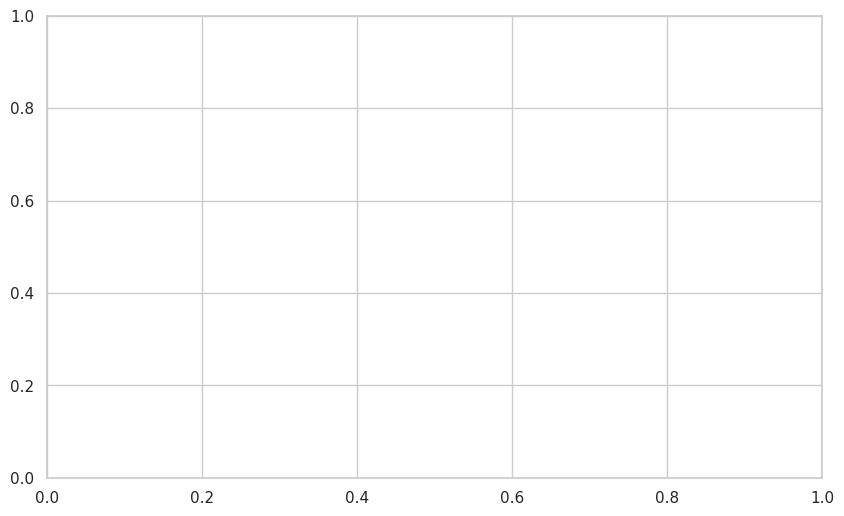

In [19]:
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="country", y="_EPS", hue="country", data=fltrd_df, palette="viridis", legend=False)
plt.title("Earnings Per Share (_EPS) by Country")
plt.xlabel("Country")
plt.ylabel("Earnings Per Share (_EPS)")
plt.show()

In [ ]:
fig3 = px.scatter(fltrd_df, x="_EPS", y="_MV", color="ICBIN",
                  labels={"x": "Earnings Per Share", "y": "Market Value"},
                  title="Earnings Per Share vs Market Value")
fig3.show()

In [ ]:
fig = px.bar(fltrd_df, x="country", y="_EPS",
             labels={"x": "Country", "y": "Earnings Per Share"},
             title="Earnings Per Share (_EPS) by Country")

# Adjust figure size and aspect ratio
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100),
    yaxis=dict(zeroline=False, gridwidth=0.5),
    xaxis=dict(zeroline=False, gridwidth=0.5),
)

fig.show()

In [ ]:
px.bar(fltrd_df, x ="country", y = "_EPS", labels={"x": "Country", "y": "Earnings Per Share"})

In [ ]:
px.bar(fltrd_df, x ="ICBIN", y = "_EPS", labels={"x": "Industry", "y": "Earnings Per Share"})



In [ ]:
#new_data = df.drop("startdate", "_MVC", "_WCO1O16", "_WC01075", "_WC01051", "_WC01075", "")

##Partition the dataframe using _CGSCORE:
**fill_df** = dataframe with no missing values across all.

**missing_df** = dataframe with missing values across  _CGSCORE  _CGVSDP050  and 32 other variables

In [20]:
# This step splits the dataframe along the lines of CGSCORE.
fill_df = fltrd_df.dropna(subset=["_CGSCORE"])
missing_df = fltrd_df[pd.isna(fltrd_df["_CGSCORE"])]


In [21]:
fill_df.head()

,ticker,ISIN,ICBIC,ICBIN,fic,country,exchange,startyear,WC06011,WC07040,INCORP,year,_EPS,_MV,_P,_PI,_RI,_WC01001,_WC01201,_WC01651,_WC02001,_WC02999,_WC03351,_WC03999,_WC04049,_WC08001,_WC02201,_WC18193,SIC,ffi48,age,logage,size,logsales,tlta,logmktcap,clta,cata,apta,arta,cfw,roa,lroa,roe,lroe,tobinq,ltobinq,mktvalue,mb,_CGSCORE,_CGVSDP050,_CGVSDP026,_CGVSDP054,_ENERDP0051,_ENERDP013,_ENERDP068,_ENERDP070,_ENERDP076,_ENERDP089,_ENERDP123,_ENPIDP015,_ENPIDP019,_ENPIDP034,_ENPIDP037,_ENPIDP066,_ENPIDP069,_ENSCORE,_SOCODP0069,_SODODP0151,_SOHSD01V,_SOSCORE,_TRESGS,_TRESGENERS,_TRESGENRRS,EMScore,logEMScore,ENVScore,logENVScore,logGOVScore,SUS_report,ESG,CO2eGDP,CO2eGDP_PPP2017,CO2eGDP_PPP,FDI_OUTGDP,FDI_INFGDP,GDP_K2015,GDP_Cur,GDPdeflator,GDP_percap2015,MktCapGDP,GovtDebtGDP,INFL_conpx,INFL_GDPdeflator,INTSpread,LENDINT,ImportsGDP,ExportsGDP,vae,pve,gee,rqe,rle,cce,ficincome,hdi_score,pop_score,gdp_score,gain,climatevul_capacity,climatevul_exposure,climatevul_sensitivity,climate_vul,climate_economic,climate_governance,climate_readiness,climate_social,ai_ranking,ai_score,ai_govt,ai_tech,ai_infr
0,EMAARDEV,AEE001901017,35,Real Estate,ARE,United Arab Emirates,Dubai Financial Market,2017.0,2810.0,35101010.0,2003.0,2020,0.50,11000.0,2.75,47.8,53.83,9758283.0,0.0,1657311.0,3349997.0,33708938.0,20209172.0,33708938.0,18883.0,11000000.0,9393236.0,0.414,1542.0,Construction,4.0,1.386294,17.333273,16.093628,0.599520,17.256222,0.249243,0.278657,0.027537,0.160847,0.065041,0.064480,0.107370,0.122766,0.218560,0.925843,1.099336,31209172.0,0.925843,38.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77086.8,0.0,0.0,0.0,0.0,0.0,0.0,3.54,0.0,0.0,0.0,3.11,14.77,0.00,0.00,0.0000,0.000000,0.0354,1.512927,3.676807,0.0,0.1477,0.490654,0.299287,0.283413,5.418825,5.689844,3.833427e+11,3.494730e+11,88.971874,41276.055513,84.364723,NaN,-2.079403,-12.031305,0.067362,29.3875,70.645301,95.926599,-1.178244,0.592547,1.285745,1.074331,0.876261,1.082544,High income,0.912,9287289.0,71374.179688,60.613445,0.414087,0.367262,0.349471,0.372438,0.71084,0.691174,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
5,DU,AEE000701012,15,Telecommunications,ARE,United Arab Emirates,Dubai Financial Market,2006.0,8210.0,15102015.0,2005.0,2020,0.40,26064.2,5.75,103.0,186.34,11083845.0,0.0,1442914.0,2242702.0,15867247.0,7297835.0,15867247.0,1709406.0,26064209.0,4642799.0,0.318,4812.0,Communication,15.0,2.708050,16.579767,16.220999,0.459931,17.322929,0.313371,0.292603,0.090637,0.124346,0.187876,0.069405,0.102415,0.168380,0.200139,2.102573,1.973014,33362044.0,2.102573,78.99,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,274915.0,0.0,0.0,0.0,0.0,0.0,0.0,24.03,1.0,0.0,1.0,35.78,44.75,8.54,60.54,0.0854,2.255493,0.2403,3.220075,4.381902,1.0,0.4475,0.490654,0.299287,0.283413,5.418825,5.689844,3.833427e+11,3.494730e+11,88.971874,41276.055513,84.364723,NaN,-2.079403,-12.031305,0.067362,29.3875,70.645301,95.926599,-1.178244,0.592547,1.285745,1.074331,0.876261,1.082544,High income,0.912,9287289.0,71374.179688,60.613445,0.414087,0.367262,0.349471,0.372438,0.71084,0.691174,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
14,DAMAC,AED001301012,35,Real Estate,ARE,United Arab Emirates,Dubai Financial Market,2015.0,2810.0,35101010.0,1978.0,2020,0.00,7865.0,1.30,55.4,70.10,4670562.0,0.0,-1039472.0,4242238.0,21135721.0,8145800.0,21135721.0,61893.0,7865000.0,7744723.0,-0.172,1542.0,Construction,6.0,1.791759,16.866476,15.356790,0.385404,16.588774,0.235105,0.366428,0.032622,0.135707,0.006170,0.003241,0.008809,-0.080021,-0.002621,0.757523,0.597992,16010800.0,0.757523,45.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36895.6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,14.80,20.14,0.00,0.00,0.0000,0.000000,0.0000,0.000000,3.838592,0.0,0.2014,0.490654,0.299287,0.283413,5.418825,5.689844,3.833427e+11,3.494730e+11,88.971874,41276.055513,84.364723,NaN,-2.079403,-12.031305,0.067362,29.3875,70.645301,95.926599,-1.178244,0.592547,1.285745,1.074331,0.876261,1.082544,High income,0.912,9287289.0,71374.179688,60.613445,0.

In [22]:
from sklearn.impute import KNNImputer

# Select columns to fill missing values
selected_columns = ["_ENERDP0051", "_ENERDP123", "CO2eGDP", "CO2eGDP_PPP2017", "CO2eGDP_PPP", "MktCapGDP", "GovtDebtGDP"]

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer to fill missing values for selected columns
fill_df.loc[:, selected_columns] = imputer.fit_transform(fill_df[selected_columns])

# Check for missing values after imputation
missing_val = fill_df[selected_columns].isna().sum()
mfill_df = pd.DataFrame(missing_val, columns=["Missing Values"]).T

print("\nMissing values after KNN imputation:")
print(mfill_df)




Missing values after KNN imputation:
                _ENERDP0051  _ENERDP123  CO2eGDP  CO2eGDP_PPP2017  \
Missing Values            0           0        0                0   

                CO2eGDP_PPP  MktCapGDP  GovtDebtGDP  
Missing Values            0          0            0  


In [23]:
fill_df.head(10)

,ticker,ISIN,ICBIC,ICBIN,fic,country,exchange,startyear,WC06011,WC07040,INCORP,year,_EPS,_MV,_P,_PI,_RI,_WC01001,_WC01201,_WC01651,_WC02001,_WC02999,_WC03351,_WC03999,_WC04049,_WC08001,_WC02201,_WC18193,SIC,ffi48,age,logage,size,logsales,tlta,logmktcap,clta,cata,apta,arta,cfw,roa,lroa,roe,lroe,tobinq,ltobinq,mktvalue,mb,_CGSCORE,_CGVSDP050,_CGVSDP026,_CGVSDP054,_ENERDP0051,_ENERDP013,_ENERDP068,_ENERDP070,_ENERDP076,_ENERDP089,_ENERDP123,_ENPIDP015,_ENPIDP019,_ENPIDP034,_ENPIDP037,_ENPIDP066,_ENPIDP069,_ENSCORE,_SOCODP0069,_SODODP0151,_SOHSD01V,_SOSCORE,_TRESGS,_TRESGENERS,_TRESGENRRS,EMScore,logEMScore,ENVScore,logENVScore,logGOVScore,SUS_report,ESG,CO2eGDP,CO2eGDP_PPP2017,CO2eGDP_PPP,FDI_OUTGDP,FDI_INFGDP,GDP_K2015,GDP_Cur,GDPdeflator,GDP_percap2015,MktCapGDP,GovtDebtGDP,INFL_conpx,INFL_GDPdeflator,INTSpread,LENDINT,ImportsGDP,ExportsGDP,vae,pve,gee,rqe,rle,cce,ficincome,hdi_score,pop_score,gdp_score,gain,climatevul_capacity,climatevul_exposure,climatevul_sensitivity,climate_vul,climate_economic,climate_governance,climate_readiness,climate_social,ai_ranking,ai_score,ai_govt,ai_tech,ai_infr
0,EMAARDEV,AEE001901017,35,Real Estate,ARE,United Arab Emirates,Dubai Financial Market,2017.0,2810.0,35101010.0,2003.0,2020,0.50,11000.00,2.75,47.8,53.83,9758283.0,0.0,1657311.0,3349997.0,33708938.0,20209172.0,33708938.0,18883.0,11000000.0,9393236.0,0.414,1542.0,Construction,4.0,1.386294,17.333273,16.093628,0.599520,17.256222,0.249243,0.278657,0.027537,0.160847,0.065041,0.064480,0.107370,0.122766,0.218560,0.925843,1.099336,31209172.0,0.925843,38.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.708680e+04,0.0,0.0,0.0,0.0,0.0,0.0,3.54,0.0,0.0,0.0,3.11,14.77,0.00,0.00,0.0000,0.000000,0.0354,1.512927,3.676807,0.0,0.1477,0.490654,0.299287,0.283413,5.418825,5.689844,3.833427e+11,3.494730e+11,88.971874,41276.055513,84.364723,67.721877,-2.079403,-12.031305,0.067362,29.3875,70.645301,95.926599,-1.178244,0.592547,1.285745,1.074331,0.876261,1.082544,High income,0.912,9287289.0,71374.179688,60.613445,0.414087,0.367262,0.349471,0.372438,0.710840,0.691174,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
5,DU,AEE000701012,15,Telecommunications,ARE,United Arab Emirates,Dubai Financial Market,2006.0,8210.0,15102015.0,2005.0,2020,0.40,26064.20,5.75,103.0,186.34,11083845.0,0.0,1442914.0,2242702.0,15867247.0,7297835.0,15867247.0,1709406.0,26064209.0,4642799.0,0.318,4812.0,Communication,15.0,2.708050,16.579767,16.220999,0.459931,17.322929,0.313371,0.292603,0.090637,0.124346,0.187876,0.069405,0.102415,0.168380,0.200139,2.102573,1.973014,33362044.0,2.102573,78.99,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.749150e+05,0.0,0.0,0.0,0.0,0.0,0.0,24.03,1.0,0.0,1.0,35.78,44.75,8.54,60.54,0.0854,2.255493,0.2403,3.220075,4.381902,1.0,0.4475,0.490654,0.299287,0.283413,5.418825,5.689844,3.833427e+11,3.494730e+11,88.971874,41276.055513,84.364723,81.299330,-2.079403,-12.031305,0.067362,29.3875,70.645301,95.926599,-1.178244,0.592547,1.285745,1.074331,0.876261,1.082544,High income,0.912,9287289.0,71374.179688,60.613445,0.414087,0.367262,0.349471,0.372438,0.710840,0.691174,0.584707,0.352107,16.0,72.395164,82.534294,51.880657,82.770538
14,DAMAC,AED001301012,35,Real Estate,ARE,United Arab Emirates,Dubai Financial Market,2015.0,2810.0,35101010.0,1978.0,2020,0.00,7865.00,1.30,55.4,70.10,4670562.0,0.0,-1039472.0,4242238.0,21135721.0,8145800.0,21135721.0,61893.0,7865000.0,7744723.0,-0.172,1542.0,Construction,6.0,1.791759,16.866476,15.356790,0.385404,16.588774,0.235105,0.366428,0.032622,0.135707,0.006170,0.003241,0.008809,-0.080021,-0.002621,0.757523,0.597992,16010800.0,0.757523,45.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.689560e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,14.80,20.14,0.00,0.00,0.0000,0.000000,0.0000,0.000000,3.838592,0.0,0.2014,0.490654,0.299287,0.283413,5.418825,5.689844,3.833427e+11,3.494730e+11,88.971874,41276.055513,84.364723,67.721877,-2.079403,-12.031305,0.067362,29.3875,70.645301,95.926599,-1.178244,0.592547,1.285745,1.074331,0.876261,1.082544,High income,0.91

In [24]:
fill_df.describe()

,ICBIC,startyear,WC06011,WC07040,INCORP,year,_EPS,_MV,_P,_PI,_RI,_WC01001,_WC01201,_WC01651,_WC02001,_WC02999,_WC03351,_WC03999,_WC04049,_WC08001,_WC02201,_WC18193,SIC,age,logage,size,logsales,tlta,logmktcap,clta,cata,apta,arta,cfw,roa,lroa,roe,lroe,tobinq,ltobinq,mktvalue,mb,_CGSCORE,_CGVSDP050,_CGVSDP026,_CGVSDP054,_ENERDP0051,_ENERDP013,_ENERDP068,_ENERDP070,_ENERDP076,_ENERDP089,_ENERDP123,_ENPIDP015,_ENPIDP019,_ENPIDP034,_ENPIDP037,_ENPIDP066,_ENPIDP069,_ENSCORE,_SOCODP0069,_SODODP0151,_SOHSD01V,_SOSCORE,_TRESGS,_TRESGENERS,_TRESGENRRS,EMScore,logEMScore,ENVScore,logENVScore,logGOVScore,SUS_report,ESG,CO2eGDP,CO2eGDP_PPP2017,CO2eGDP_PPP,FDI_OUTGDP,FDI_INFGDP,GDP_K2015,GDP_Cur,GDPdeflator,GDP_percap2015,MktCapGDP,GovtDebtGDP,INFL_conpx,INFL_GDPdeflator,INTSpread,LENDINT,ImportsGDP,ExportsGDP,vae,pve,gee,rqe,rle,cce,hdi_score,pop_score,gdp_score,gain,climatevul_capacity,climatevul_exposure,climatevul_sensitivity,climate_vul,climate_economic,climate_governance,climate_readiness,climate_social,ai_ranking,ai_score,ai_govt,ai_tech,ai_infr
count,19257.000000,19257.000000,19257.000000,1.925700e+04,19257.000000,19257.000000,19257.000000,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,1.925700e+04,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,1.925700e+04,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.00000,1.925700e+04,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,1.925700e+04,1.925700e+04,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,1.925700e+04,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000,19257.000000
mean,38.757854,2001.089422,5300.858805,3.891686e+07,1979.501532,2020.686088,143.449645,7.180104e+05,2.689899e+03,3.201753e+06,5.687637e+20,1.016969e+09,1.141118e+07,9.061185e+07,2.546555e+08,1.740984e+09,8.663169e+08,1.740984e+09,2.524015e+07,1.433486e+09,6.581811e+08,143.650641,3992.314453,20.596666,2.777641,16.545858,16.068541,0.546297,17.058384,0.275476,0.435479,0.087415,0.131435,0.102856,0.058534,-0.005039,-0.003579,0.052406,2.207520,2.112827,2.299802e+09,2.207520,58.897303,0.426338,0.837150,0.546554,0.831978,0.077946,0.126188,0.468972,0.353118,0.65680,2.258659e+06,0.000052,0.540479,0.000415,0.006751,0.136989,0.227813,51.456930,0.855533,0.324453,0.941839,59.676173,57.483435,57.728381,58.153663,0.577284,3.651118,0.514569,3.616043,4.007872,0.837150,0.574834,0.305171,0.208649,0.196676,3.430778,3.572200,5.964264e+12,6.599929e+12,143.529989,41290.142831,283.784301,98.732233,2.617613,3.449857,4.217971,6.492873,43.188601,45.236863,0.735014,0.322910,1.184253,1.152053,1.133745,1.106022,0.861928,1.786126e+08,44399.917969,61.887897,0.335969,0.438046,0.262136,0.344191,0.552042,0.649769,0.581949,0.544014,20.181596,71.541267,73.687019,59.387756,81.549019
std,15.855073,12.997115,2164.666836,1.588052e+07,31.962305,0.695234,1854.156052,1.025923e+07,2.961589e+04,1.739225e+08,5.580844e+22,8.702302e+09,2.480359e+08,1.048080e+09,2.619036e+09,1.548361e+10,7.689835e+09,1.548361e+10,3.832025e+08,1.479227e+10,6.084936e+09,2074.172596,1982.228760,13.036489,

In [28]:
# Save the DataFrame as a CSV file

file_path = "/content/drive/My Drive/fill_df_for_tableau.csv"
file_path2 = "/content/drive/My Drive/missing_df_for_tableau.csv"

fill_df.to_csv(file_path, index=False)
missing_df.to_csv(file_path2, index=False)

In [ ]:
xyz = fill_df.isna().sum()
fill_df = pd.DataFrame(xyz, columns=["Missing Values"]).T

print("\nMissing values after filtering:")
print(fill_df)